In [2]:
import streamlit as st
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
conn = st.connection('mysql', type='sql')
df = conn.query("SELECT * FROM website_event")

2024-11-05 22:38:44.572 
  command:

    streamlit run C:\Users\Brian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-05 22:38:44.855 No runtime found, using MemoryCacheStorageManager
2024-11-05 22:38:44.858 No runtime found, using MemoryCacheStorageManager


In [42]:
df.head()

,event_id,website_id,session_id,created_at,url_path,url_query,referrer_path,referrer_query,referrer_domain,page_title,event_type,event_name,visit_id
0,000017d4-c44e-46fa-a1e3-cf4adc79d24a,2f694eab-769e-420a-bb31-4efcb3662bf5,178ba814-d31e-5be6-a1c2-e59acb6e7996,2022-11-09 22:11:55,/,current=n_3_n&size=n_20_n&filters%5B0%5D%5Bfie...,/,current=n_2_n&size=n_20_n&filters%5B0%5D%5Bfie...,,None,1,None,6374bf4d-edcd-4ca1-8ef0-0dcf1952d068
1,00002ddf-0422-4da5-859f-0225b834ee74,2f694eab-769e-420a-bb31-4efcb3662bf5,9f4065ff-c992-5641-b250-fccbb4c56728,2023-07-23 09:10:06,/,size=n_20_n&filters%5B0%5D%5Bfield%5D=industri...,/,current=n_5_n&size=n_20_n&filters%5B0%5D%5Bfie...,None,Advisory Mentorship Programme,2,Read more (grid view),248e90b0-8cae-4238-ae19-62083b98d471
2,000083f8-8424-4e3d-9939-5273a5df0992,2f694eab-769e-420a-bb31-4efcb3662bf5,17b4eef9-3837-5073-90d3-960c072103e2,2024-09-04 12:11:28,/mentors,size=n_80_n,/mentors,None,,Advisory Mentorship Programme,2,Impression,4ffcdec6-5a04-5d16-8603-97a28d8fecf8
3,0000ac3c-2dd2-4690-bd0d-ba2fade61950,2f694eab-769e-420a-bb31-4efcb3662bf5,13a244d0-1b4f-5b7e-8686-89cf6a705f12,2024-08-04 12:05:45,/mentors,q=founder&size=n_80_n,/mentors,size=n_80_n,,Advisory Mentorship Programme,2,Impression,e5a8cdd8-61c9-5c9b-91d4-c81f88d16f75
4,0000b3d5-4cd7-4b1d-872b-4f31fb9e596f,2f694eab-769e-420a-bb31-4efcb3662bf5,a67664a2-4e7c-5454-a9d6-368cab2e79a8,2024-08-04 09:00:34,/mentors,None,/,,mentorship.advisory.sg,Advisory Mentorship Programme,2,Impression,16d08a73-7778-5d34-96b6-6379f96b5712


In [ ]:
# Unused
df['session_id'].value_counts().to_csv(path_or_buf="output.csv")

In [ ]:
# UNUSED
time_list = []
series = df['session_id'].value_counts()
for session_id in series[series >= 2].index[:]:
    dates = df[df['session_id'] == session_id]['created_at']
    time_list.append(dates.max() - dates.min())
print(time_list)

[Timedelta('0 days 06:09:38'), Timedelta('1 days 06:09:01'), Timedelta('22 days 02:48:33'), Timedelta('13 days 21:15:36'), Timedelta('0 days 09:46:10'), Timedelta('7 days 01:30:50'), Timedelta('0 days 03:47:12'), Timedelta('6 days 23:47:45'), Timedelta('1 days 04:34:45'), Timedelta('0 days 02:41:21'), Timedelta('0 days 05:35:58'), Timedelta('0 days 04:03:18'), Timedelta('15 days 07:26:26'), Timedelta('1 days 11:51:10'), Timedelta('0 days 00:40:50'), Timedelta('4 days 07:27:45'), Timedelta('0 days 00:24:38'), Timedelta('0 days 00:20:37'), Timedelta('0 days 01:21:53'), Timedelta('0 days 00:36:59'), Timedelta('1 days 01:40:16'), Timedelta('0 days 00:08:03'), Timedelta('0 days 06:10:27'), Timedelta('0 days 00:54:38'), Timedelta('8 days 23:39:54'), Timedelta('1 days 10:46:05'), Timedelta('0 days 08:57:48'), Timedelta('0 days 06:58:16'), Timedelta('13 days 02:12:03'), Timedelta('0 days 00:27:38'), Timedelta('0 days 00:36:39'), Timedelta('5 days 00:30:41'), Timedelta('0 days 01:22:44'), Timed

In [ ]:
# WARNING this is TIME CONSUMING (19 min on my machine *cries*)
import pandas as pd
series = df['session_id'].value_counts()
df2 = pd.DataFrame(columns=["Time"])
session_ids = series[series >= 2].index[:]
for i in range(len(session_ids)):
    session_id = session_ids[i]
    dates = df[df['session_id'] == session_id]['created_at']
    df2.loc[i] = (dates.max() - dates.min())
print(df2)

                  Time
0      0 days 06:09:38
1      1 days 06:09:01
2     22 days 02:48:33
3     13 days 21:15:36
4      0 days 09:46:10
...                ...
28878  0 days 00:00:01
28879  0 days 00:00:01
28880  0 days 00:00:01
28881  0 days 00:00:02
28882  0 days 00:00:00

[28883 rows x 1 columns]


In [7]:
total_time =  pandas.Timedelta(0)
for time in time_list:
    total_time += time
print(total_time)
print(len(time_list))
print(total_time / len(time_list))

18163 days 19:40:36
28875
0 days 15:05:49.923324675


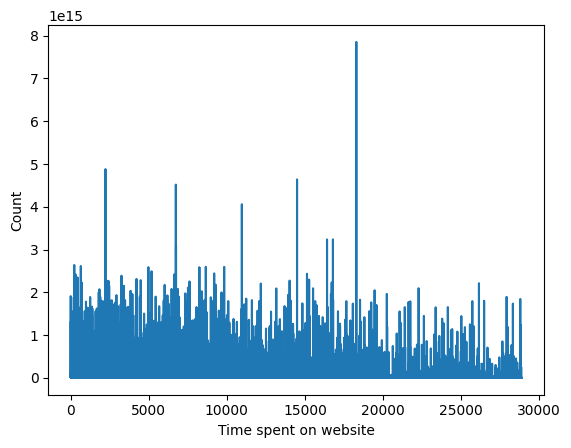

In [ ]:
pandas.Series(time_list).plot(kind="line", xlabel="Time spent on website", ylabel="Count")
plt.show()

In [ ]:
# Convert from timedelta to float seconds because Seaborn cannot handle timedelta
df3 = pd.DataFrame(columns=["Time Seconds"])
df3['Time Seconds'] = df2['Time']
def convert_to_seconds(timedelta):
    return float(timedelta.total_seconds())
df3['Time Seconds'] = df3['Time Seconds'].apply(convert_to_seconds)
print(df3)


       Time Seconds
0           22178.0
1          108541.0
2         1910913.0
3         1199736.0
4           35170.0
...             ...
28878           1.0
28879           1.0
28880           1.0
28881           2.0
28882           0.0

[28883 rows x 1 columns]


C:\Users\Brian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Time Seconds', ylabel='Count'>

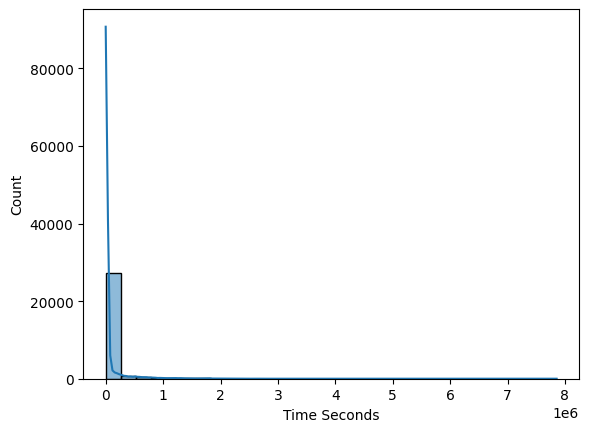

In [ ]:
# Plot the entire range of time spent
import seaborn as sns 
sns.histplot(data=df3['Time Seconds'], bins=30, kde=True)

<Axes: xlabel='Time Seconds', ylabel='Count'>

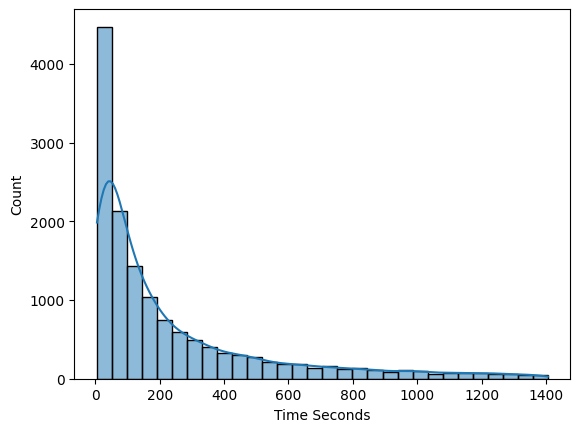

In [ ]:
# Only plot the 25th to 75th percentile
sns.histplot(data=df3[(df3['Time Seconds'] > 4) & (df3['Time Seconds'] < 1406.25)]['Time Seconds'], bins=30, kde=True)